In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import statsmodels.api as sm
from sklearn.model_selection import train_test_split
import warnings
warnings.filterwarnings("ignore")

from ggplot import *
from scipy.stats import logistic
from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix, mean_squared_error
from sklearn.model_selection import train_test_split
from sklearn import preprocessing
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import *
from sklearn.tree import DecisionTreeClassifier, DecisionTreeRegressor, export_graphviz
import graphviz
from sklearn.ensemble import RandomForestRegressor, RandomForestClassifier
from sklearn.svm import SVC, SVR

# LEC 7 Tree 실습

종속변수 y가 범주형인걸 예측하면 DecisionTreeClassifier
종속변수가 연속형인걸 예측하면 DecisionTreeRegressor

In [3]:
file1="c:/temp/credit.csv"
data1=pd.read_csv(file1)
data1

,checking_balance,months_loan_duration,credit_history,purpose,amount,savings_balance,employment_length,installment_rate,personal_status,other_debtors,...,property,age,installment_plan,housing,existing_credits,default,dependents,telephone,foreign_worker,job
0,< 0 DM,6,critical,radio/tv,1169,unknown,> 7 yrs,4,single male,none,...,real estate,67,none,own,2,1,1,yes,yes,skilled employee
1,1 - 200 DM,48,repaid,radio/tv,5951,< 100 DM,1 - 4 yrs,2,female,none,...,real estate,22,none,own,1,2,1,none,yes,skilled employee
2,unknown,12,critical,education,2096,< 100 DM,4 - 7 yrs,2,single male,none,...,real estate,49,none,own,1,1,2,none,yes,unskilled resident
3,< 0 DM,42,repaid,furniture,7882,< 100 DM,4 - 7 yrs,2,single male,guarantor,...,building society savings,45,none,for free,1,1,2,none,yes,skilled employee
4,< 0 DM,24,delayed,car (new),4870,< 100 DM,1 - 4 yrs,3,single male,none,...,unknown/none,53,none,for free,2,2,2,none,yes,skilled employee
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,unknown,12,repaid,furniture,1736,< 100 DM,4 - 7 yrs,3,female,none,...,real estate,31,none,own,1,1,1,none,yes,unskilled resident
996,< 0 DM,30,repaid,car (used),3857,< 100 DM,1 - 4 yrs,4,divorced male,none,...,building society savings,40,none,own,1,1,1,yes,yes,mangement self-employed
997,unknown,12,repaid,radio/tv,804,< 100 DM,> 7 yrs,4,single male,none,...,other,38,none,own,1,1,1,none,yes,skilled employee
998,< 0 DM,45,repaid,radio/tv,1845,< 100 DM,1 - 4 yrs,4,single male,none,...,unknown/none,23,none,for free,1,2,1,yes,yes,skilled employee


In [4]:
pd.value_counts(data1['default'])
# 2 yes 1 no=no default

1    700
2    300
Name: default, dtype: int64

In [5]:
# y변수 생성
# x 변수는 위에 있는 것들 중에 몇개만 써서 해보자 -> credit_history, age, amount

y=data1['default']

In [6]:
pd.value_counts(data1['credit_history'])

repaid                    530
critical                  293
delayed                    88
fully repaid this bank     49
fully repaid               40
Name: credit_history, dtype: int64

- 회기 분석 시 x가 범주형이면 더미로 바꾸어야 함.
- 예 credit history가 5개 범주형 변수니까, 4개의 더미로 바꿈
- 총 생기는 x 변수 개수 : age,amount, 4개 더미 변수 = 6개 변수
- 왜 이렇게 되는 지는 계량 공부하3 : dummy variable trap

In [7]:
X1=pd.get_dummies(data1['credit_history'],drop_first=True)
X1

,delayed,fully repaid,fully repaid this bank,repaid
0,0,0,0,0
1,0,0,0,1
2,0,0,0,0
3,0,0,0,1
4,1,0,0,0
...,...,...,...,...
995,0,0,0,1
996,0,0,0,1
997,0,0,0,1
998,0,0,0,1


In [8]:
# pd.concat : 은 이제 더미로 만든 변수들까지 넣어서 내가 회기분석에 쓸 변수 만들기 위해 다 엮는 것
X=pd.concat([X1,data1['amount'],data1['age']])
X

,delayed,fully repaid,fully repaid this bank,repaid,0
0,0.0,0.0,0.0,0.0,NaN
1,0.0,0.0,0.0,1.0,NaN
2,0.0,0.0,0.0,0.0,NaN
3,0.0,0.0,0.0,1.0,NaN
4,1.0,0.0,0.0,0.0,NaN
...,...,...,...,...,...
995,NaN,NaN,NaN,NaN,31.0
996,NaN,NaN,NaN,NaN,40.0
997,NaN,NaN,NaN,NaN,38.0
998,NaN,NaN,NaN,NaN,23.0


In [9]:
X=pd.concat([X1,data1['amount'],data1['age']], axis='columns')
X

,delayed,fully repaid,fully repaid this bank,repaid,amount,age
0,0,0,0,0,1169,67
1,0,0,0,1,5951,22
2,0,0,0,0,2096,49
3,0,0,0,1,7882,45
4,1,0,0,0,4870,53
...,...,...,...,...,...,...
995,0,0,0,1,1736,31
996,0,0,0,1,3857,40
997,0,0,0,1,804,38
998,0,0,0,1,1845,23


In [10]:
# 일단 train test set 하지 않고 전체 데이터로 tree 만들기

tree=DecisionTreeClassifier(max_depth=3, random_state=0)
result1=tree.fit(X,y)
result1

DecisionTreeClassifier(max_depth=3, random_state=0)

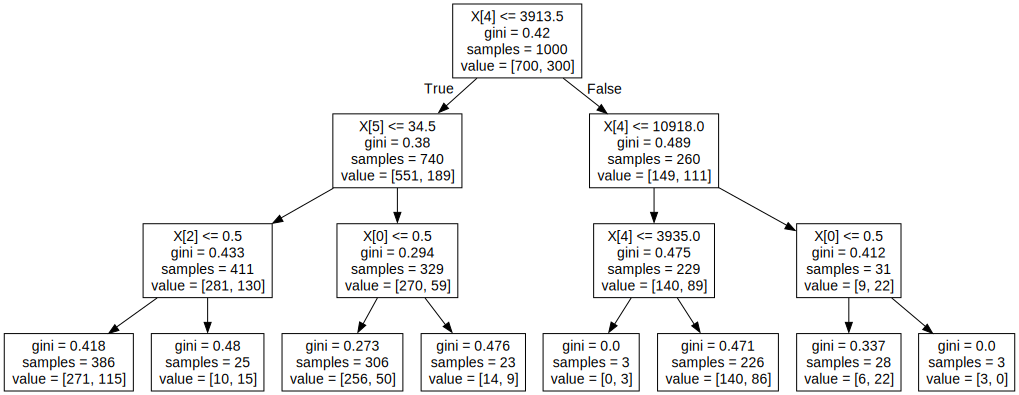

In [11]:
# tree 그리기 시험엔 안나옴

dot_data=export_graphviz(result1)
tree_graph=graphviz.Source(dot_data)
tree_graph

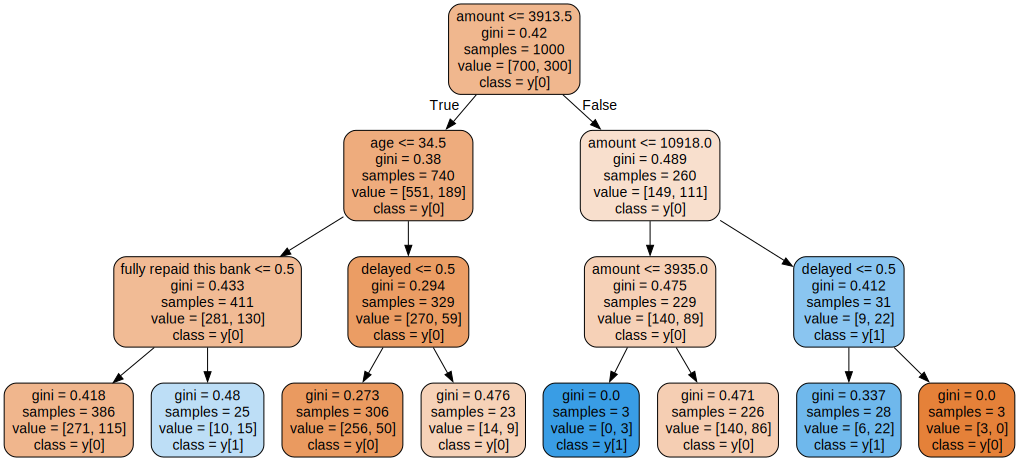

In [12]:
# tree 예쁘게 그리기

dot_data=export_graphviz(result1,feature_names=X.columns,filled=True,rounded=True,class_names=True)
tree_graph=graphviz.Source(dot_data)
tree_graph

## Tree 해석 ( 시 험 !)

1. 예측에 제일 중요한 변수 : amount / 가장 위에 있으니까
2. 필기 추가
3. class=y[0] 해당 terminal node는 0으로 예측
4. 1이면 파란색, 0이면 주황색, 지니계수 낮을수록=순도 높을 수록 진해진다

q. amount=3000, age=25, fully repaid this bank=1의 예측값은?

a.1 (두번째 final node) -> default 하니까 , 안빌려줄 것


In [13]:
# 맨처음 tree node의 gini index 실제로 구해보자.
1-(0.7**2+0.3**2)

0.42000000000000004

In [14]:
1-((271/386)**2+(115/386)**2)

0.4183333780772638

#### Entropy로 그림 그려보자

In [15]:
tree2=DecisionTreeClassifier(max_depth=3, random_state=0,criterion='entropy')
result2=tree2.fit(X,y)
result2

DecisionTreeClassifier(criterion='entropy', max_depth=3, random_state=0)

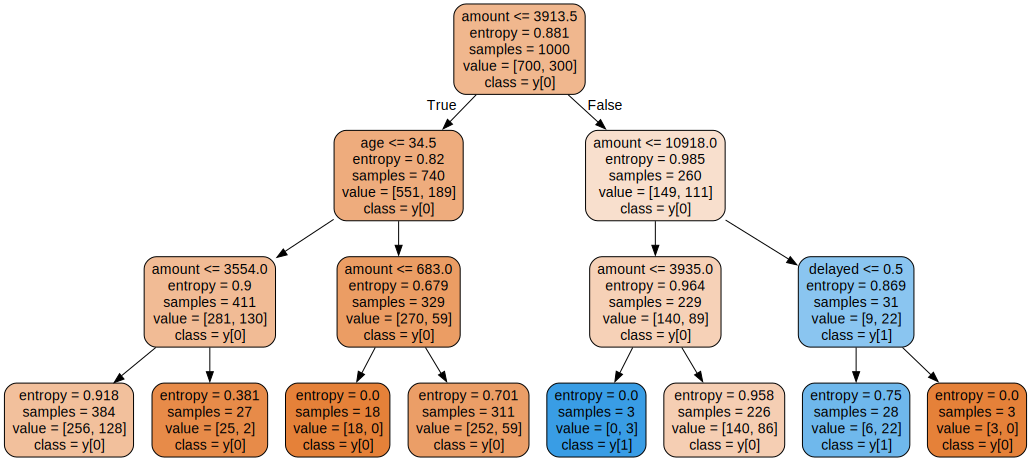

In [16]:
dot_data=export_graphviz(result2,feature_names=X.columns, filled=True, rounded=True, class_names=True)
tree_graph=graphviz.Source(dot_data)
tree_graph

In [17]:
# 맨 위의 엔트로피 값 계산 해보자

-0.7*np.log2(0.7)-0.3*np.log2(0.3)


0.8812908992306927

### Tree의 예측 성과를 판단해보자

In [18]:
y_pred=result1.predict(X)
y_pred

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 1, 1, 1, 1, 1, 1, 1, 2, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2,
       1, 1, 1, 1, 1, 1, 1, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 2, 1, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,

In [19]:
confusion_matrix(y,y_pred)

array([[684,  16],
       [260,  40]], dtype=int64)

In [20]:
(684+40)/1000

0.724

In [21]:
y_pred2=result2.predict(X)
confusion_matrix(y,y_pred2)

array([[694,   6],
       [275,  25]], dtype=int64)

In [22]:
(694+25)/1000

0.719

In [23]:
# 각 노드에서 0일 확률, 1일 확률 구해보기
y_pred1=result1.predict_proba(X)
y_pred1

array([[0.83660131, 0.16339869],
       [0.61946903, 0.38053097],
       [0.83660131, 0.16339869],
       ...,
       [0.83660131, 0.16339869],
       [0.70207254, 0.29792746],
       [0.61946903, 0.38053097]])

# LEC 8 Regression Tree

In [24]:
file2="c:/temp/Boston.csv"
data2=pd.read_csv(file2)
data2

,crim,zn,indus,chas,nox,rm,age,dis,rad,tax,ptratio,black,lstat,medv
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222,18.7,396.90,5.33,36.2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
501,0.06263,0.0,11.93,0,0.573,6.593,69.1,2.4786,1,273,21.0,391.99,9.67,22.4
502,0.04527,0.0,11.93,0,0.573,6.120,76.7,2.2875,1,273,21.0,396.90,9.08,20.6
503,0.06076,0.0,11.93,0,0.573,6.976,91.0,2.1675,1,273,21.0,396.90,5.64,23.9
504,0.10959,0.0,11.93,0,0.573,6.794,89.3,2.3889,1,273,21.0,393.45,6.48,22.0


In [25]:
y=data2['medv']
X=data2.drop('medv',axis=1)

X_train=X.iloc[:400,:]
X_test=X.iloc[400:,:]
y_train=y.iloc[:400]
y_test=y.iloc[400:]

In [26]:
tree3=DecisionTreeRegressor(max_depth=3, random_state=0)
result3=tree3.fit(X_train,y_train)
result3

DecisionTreeRegressor(max_depth=3, random_state=0)

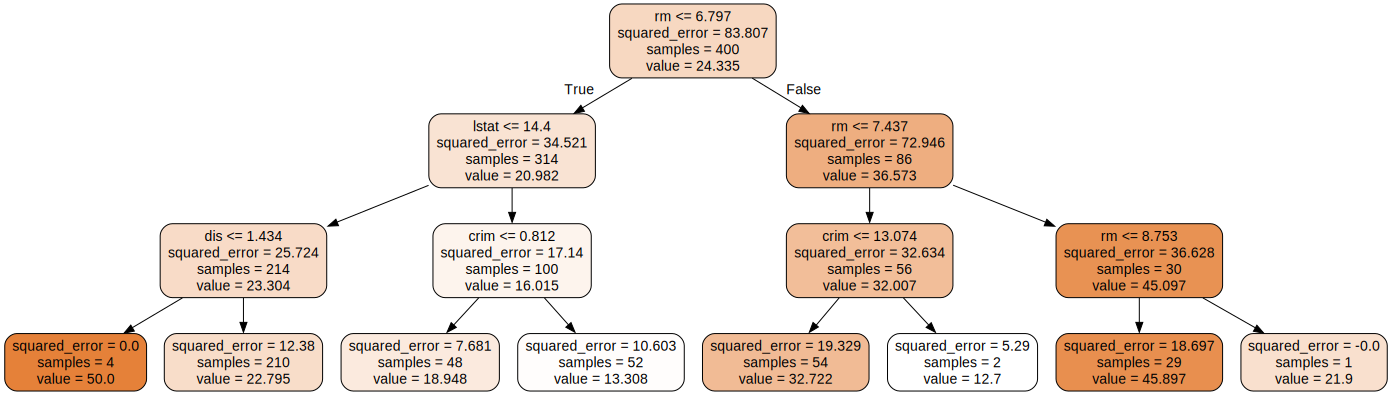

In [27]:
dot_data=export_graphviz(result3,feature_names=X.columns, filled=True, rounded=True, class_names=True)
tree_graph=graphviz.Source(dot_data)
tree_graph

## Tree 해석 ! DecisionTreeRegressor

1. tree size= final node 개수 = 8개
2. tree depth = 3 
잠만 이게 맞아? 1,2번?
3. rm : 맨위 root에 있는 변수 = 가장 중요한 변수
4. squared_error : 34.512 : 필기 꼭추가
5. 색이 진할 수록 주택가격 y 이 높은 지역
6. 예측 성과 필기 추가

In [28]:
# test set에 대한 예측 성과 계산해보쟈

y_pred3=result3.predict(X_test) # 106개의 예측값 나올 것이다
y_pred3

array([13.30769231, 13.30769231, 13.30769231, 13.30769231, 13.30769231,
       13.30769231, 13.30769231, 50.        , 13.30769231, 12.7       ,
       50.        , 13.30769231, 13.30769231, 13.30769231, 13.30769231,
       13.30769231, 13.30769231, 13.30769231, 13.30769231, 32.72222222,
       13.30769231, 13.30769231, 22.7952381 , 13.30769231, 13.30769231,
       13.30769231, 13.30769231, 13.30769231, 13.30769231, 13.30769231,
       13.30769231, 32.72222222, 22.7952381 , 13.30769231, 13.30769231,
       13.30769231, 13.30769231, 13.30769231, 13.30769231, 13.30769231,
       13.30769231, 13.30769231, 13.30769231, 13.30769231, 13.30769231,
       13.30769231, 13.30769231, 13.30769231, 13.30769231, 13.30769231,
       13.30769231, 13.30769231, 13.30769231, 32.72222222, 13.30769231,
       13.30769231, 13.30769231, 13.30769231, 13.30769231, 13.30769231,
       13.30769231, 13.30769231, 22.7952381 , 22.7952381 , 22.7952381 ,
       22.7952381 , 13.30769231, 13.30769231, 13.30769231, 13.30

In [29]:
# 연속형 변수의 경우, 
# 예측 성과 : MSE (Mean Squared Error) 
# ^- Lec 3 에서 함 -> 예측성과 쓰라고 하면 45.381 이라고 쓰면된다

np.mean((y_test-y_pred3)**2)

45.38108891089222

In [30]:
# 이걸 한번에 계산해주는 명령어
mean_squared_error(y_test,y_pred3)

45.38108891089216